In [5]:
from pyforest import *

In [6]:
df = pd.read_csv('ford.csv')

<IPython.core.display.Javascript object>

In [7]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,145,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [9]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        model   year  price  transmission  mileage  fuelType    tax    mpg  \
0      False  False  False         False    False     False  False  False   
1      False  False  False         False    False     False  False  False   
2      False  False  False         False    False     False  False  False   
3      False  False  False         False    False     False  False  False   
4      False  False  False         False    False     False  False  False   
...      ...    ...    ...           ...      ...       ...    ...    ...   
17961  False  False  False         False    False     False  False  False   
17962  False  False  False         False    False     False  False  False   
17963  False  False  False         False    False     False  False  False   
17964  False  False  False         False    False     False  False  False   
17965  False  False  False         False    False     False  False  False   

       engine

In [10]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [11]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

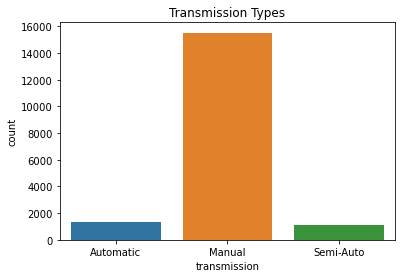

In [12]:
sns.countplot(x='transmission', data=df)
plt.title('Transmission Types')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

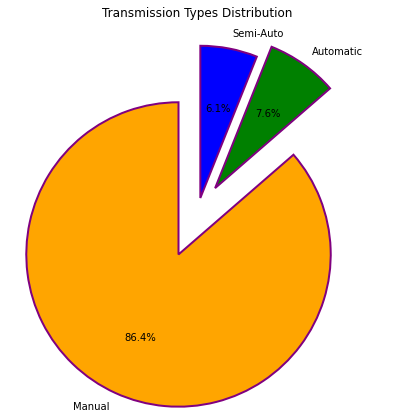

In [13]:
fig = plt.figure(figsize=(7,7))
colors = ("orange", "green", "blue")
wp = {'linewidth':2, 'edgecolor':"purple"}
tags= df['transmission'].value_counts()
explode = (0.3, 0.2, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = colors, startangle=90,
          wedgeprops = wp, label='', explode = explode)
plt.title('Transmission Types Distribution')
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

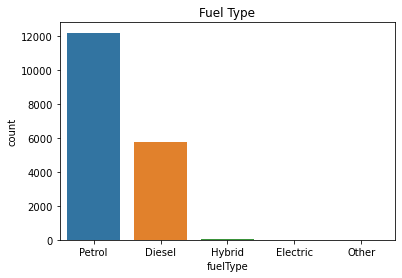

In [14]:
sns.countplot(x='fuelType', data=df)
plt.title('Fuel Type')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

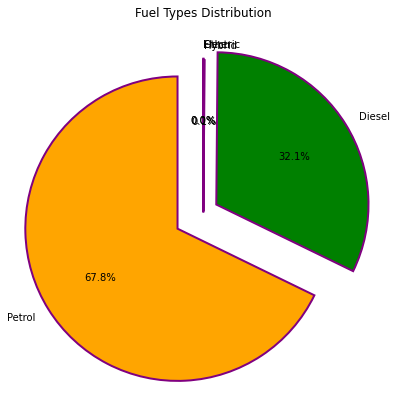

In [15]:
fig = plt.figure(figsize=(7,7))
colors = ("orange", "green", "blue","red","yellow")
wp = {'linewidth':2, 'edgecolor':"purple"}
tags= df['fuelType'].value_counts()
explode = (0.2, 0.1, 0.001,0.01,0.01)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = colors, startangle=90,
          wedgeprops = wp, label='', explode = explode)
plt.title('Fuel Types Distribution')
plt.show()



In [16]:
print(df['fuelType'].value_counts())

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64


In [17]:
df.fuelType.value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [18]:
fuelType = df['fuelType']
transmission = df['transmission']
price = df['price']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='transmission', ylabel='price'>

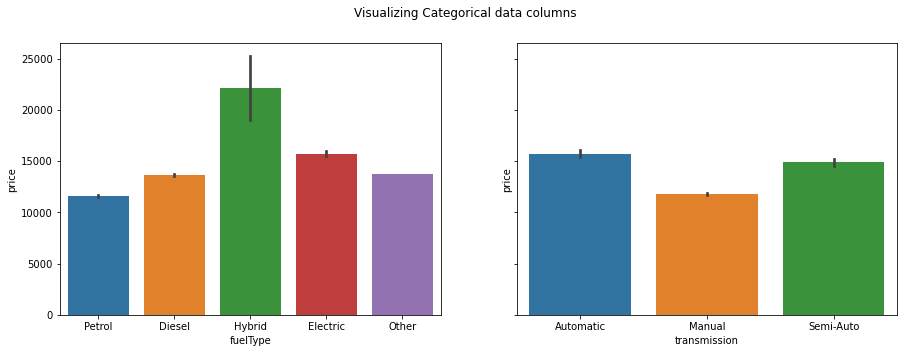

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15,5),sharey=True)
fig.suptitle('Visualizing Categorical data columns')
sns.barplot(x=fuelType, y=price, ax = axes[0])
sns.barplot(x=transmission, y=price, ax=axes[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='transmission', ylabel='price'>

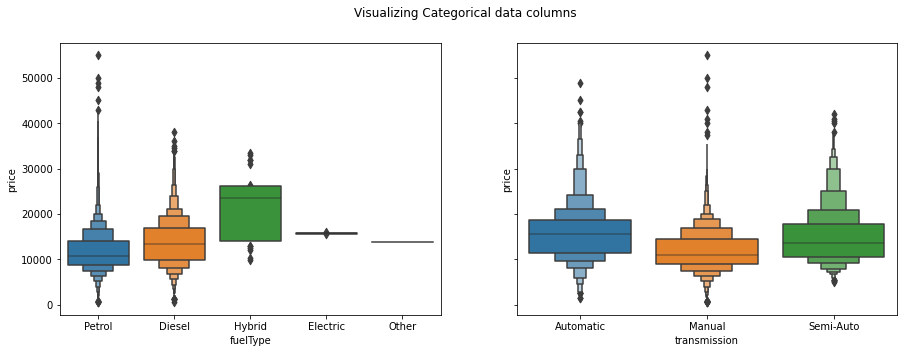

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,5),sharey=True)
fig.suptitle('Visualizing Categorical data columns')
sns.boxenplot(x=fuelType, y=price, ax = axes[0])
sns.boxenplot(x=transmission, y=price, ax=axes[1])

<AxesSubplot:>

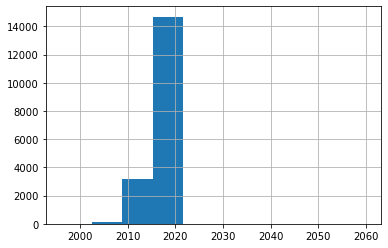

In [21]:
df.year.hist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

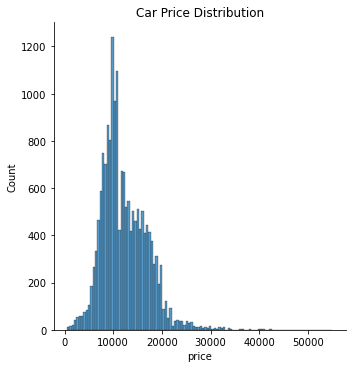

In [22]:
sns.displot(df.price)
plt.title('Car Price Distribution')
plt.show()

<IPython.core.display.Javascript object>

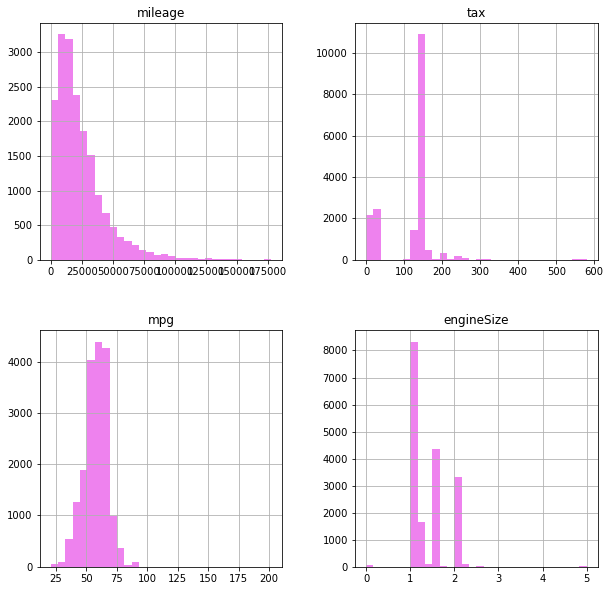

In [23]:
df[['mileage','tax','mpg','engineSize']].hist(bins=30, figsize=(10,10),color = 'violet')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

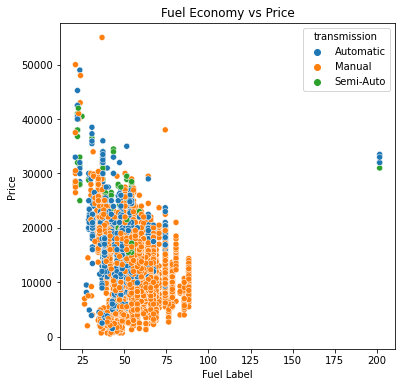

In [24]:
plt.figure(figsize=(6,6))
plt.title('Fuel Economy vs Price')
sns.scatterplot(x=df['mpg'],y=df['price'], hue=df['transmission'])
plt.xlabel('Fuel Label')
plt.ylabel('Price')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

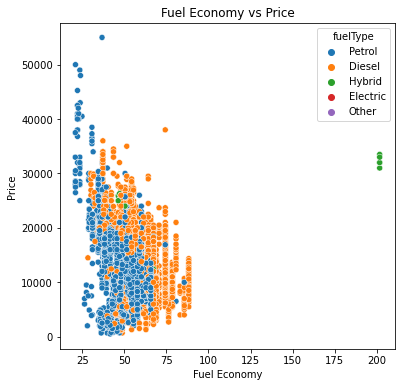

In [25]:
plt.figure(figsize=(6,6))
plt.title('Fuel Economy vs Price')
sns.scatterplot(x=df['mpg'],y=df['price'], hue=df['fuelType'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()

In [26]:
df.replace({'transmission':{'Manual':0, 'Automatic':1, 'Semi-Auto':2}}, inplace=True)

In [27]:
df.replace({'fuelType':{'Petrol':0, 'Diesel':1, 'Hybrid':2, 'Electric':3,'Other':4}}, inplace=True)

In [28]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,1,15944,0,150,57.7,1.0
1,Focus,2018,14000,0,9083,0,150,57.7,1.0
2,Focus,2017,13000,0,12456,0,150,57.7,1.0
3,Fiesta,2019,17500,0,10460,0,145,40.3,1.5
4,Fiesta,2019,16500,1,1482,0,145,48.7,1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

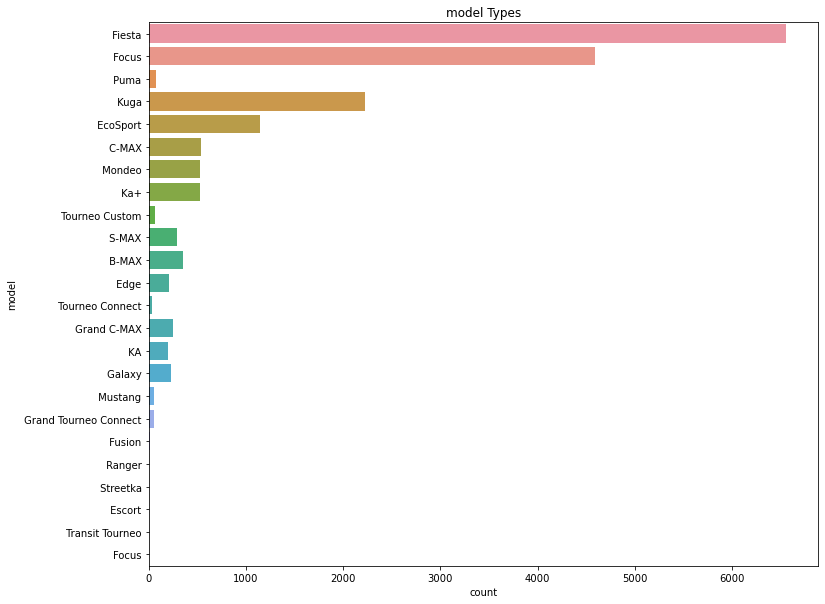

In [29]:
plt.figure(figsize=(12,10))
sns.countplot(y='model', data=df)
plt.title('model Types')
plt.show()

In [30]:
df.model.value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

In [31]:
mod_df = df.drop('model', axis=1)

In [32]:
mod_df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,1,15944,0,150,57.7,1.0
1,2018,14000,0,9083,0,150,57.7,1.0
2,2017,13000,0,12456,0,150,57.7,1.0
3,2019,17500,0,10460,0,145,40.3,1.5
4,2019,16500,1,1482,0,145,48.7,1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

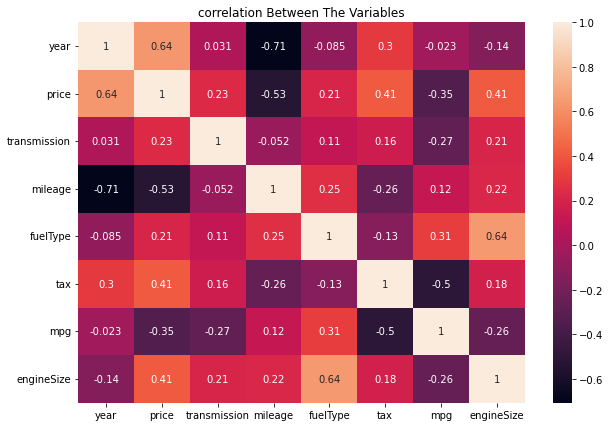

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(mod_df.corr(), annot=True)
plt.title('correlation Between The Variables')
plt.show()

In [34]:
mod_df.corr()['price'].sort_values()

mileage        -0.530659
mpg            -0.346419
fuelType        0.209225
transmission    0.231806
tax             0.406857
engineSize      0.411178
year            0.636009
price           1.000000
Name: price, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

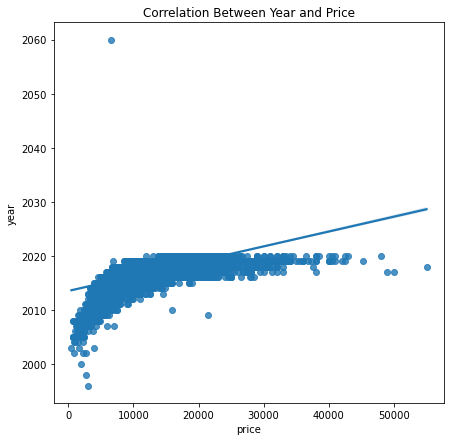

In [35]:
fig = plt.figure(figsize=(7,7))
plt.title('Correlation Between Year and Price')
sns.regplot(x='price', y='year', data=df)
plt.show()